In [104]:
import os
import seaborn as sns
import pandas as pd
# import ydata_profiling
%matplotlib inline
import matplotlib.pyplot as plt

In [105]:
extract_path = 'AI_Project_Data/'

In [106]:
csv_employee_survey_data = os.path.join(extract_path, 'employee_survey_data.csv')
csv_general_data = os.path.join(extract_path, 'general_data.csv')
csv_manager_survey_data = os.path.join(extract_path, 'manager_survey_data.csv')

csv_in_time = os.path.join(extract_path, 'in_time.csv')
csv_out_time = os.path.join(extract_path, 'out_time.csv')

In [107]:
employee_survey_data = pd.read_csv(csv_employee_survey_data)
global_data = pd.read_csv(csv_general_data)
in_time_raw = pd.read_csv(csv_in_time)
out_time_raw = pd.read_csv(csv_out_time)
manager_survey_data = pd.read_csv(csv_manager_survey_data)

# Merge employee_survey_data, general_data et manager_survey_data on EmployeeID

general_data = pd.merge(employee_survey_data, global_data, on='EmployeeID')
general_data = pd.merge(general_data, manager_survey_data, on='EmployeeID')

In [108]:
in_time_raw = pd.read_csv(csv_in_time)
out_time_raw = pd.read_csv(csv_out_time)

# Transformer les dataframes (passer les colonnes de dates en lignes)
in_time_melted = in_time_raw.melt(id_vars=['Unnamed: 0'], var_name='date', value_name='arrival_time')
out_time_melted = out_time_raw.melt(id_vars=['Unnamed: 0'], var_name='date', value_name='departure_time')

# Renommer la colonne ID
in_time_melted.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
out_time_melted.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Fusionner les deux DataFrames sur 'id' et 'date'
merged_df = pd.merge(in_time_melted, out_time_melted, on=['id', 'date'], how='outer')

merged_df['arrival_time'] = pd.to_datetime(merged_df['arrival_time'])
merged_df['departure_time'] = pd.to_datetime(merged_df['departure_time'])

# Calculer le temps travaillé (différence entre départ et arrivée)
merged_df['worked_time'] = merged_df['departure_time'] - merged_df['arrival_time']

# Convertir en heures pour avoir un format lisible
merged_df['worked_hours'] = merged_df['worked_time'].dt.total_seconds() / 3600

# Trier par id et date
merged_df.sort_values(by=['id', 'date'], inplace=True)

# merged_clock_in_report = ydata_profiling.ProfileReport(merged_df, title='Merged Data')
# merged_clock_in_report.to_notebook_iframe()

In [109]:
merged_df['date'] = pd.to_datetime(merged_df['date'], format='mixed')
general_data['Attrition'] = general_data['Attrition'].replace({
    "Yes": 1,
    "No": 0
})
general_data['Gender'] = general_data['Gender'].replace({
    "Male": 1,
    "Female": 0
})
general_data['Over18'] = general_data['Over18'].replace({
    "Y": 1,
    "N": 0
})
general_data['EducationField'] = general_data['EducationField'].replace({
    "Human Resources": 5,
    "Technical Degree":4,
    "Marketing": 3,
    "Medical": 2,
    "Life Sciences": 1,
    "Other": 0
})
general_data['BusinessTravel'] = general_data['BusinessTravel'].replace({
    "Travel_Frequently": 2,
    "Travel_Rarely": 1,
    "Non-Travel": 0
})
general_data['JobRole'] = general_data['JobRole'].replace({
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
})
general_data['MaritalStatus'] = general_data['MaritalStatus'].replace({
    "Married": 2,
    "Single": 1,
    "Divorced": 0
})
general_data['Department'] = general_data['Department'].replace({
    "Research & Development": 2,
    "Sales": 1,
    "Human Resources": 0
})

/var/folders/2g/j9vx62552g15xf51dnw6xt1m0000gr/T/ipykernel_5605/3927044628.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  general_data['Attrition'] = general_data['Attrition'].replace({
/var/folders/2g/j9vx62552g15xf51dnw6xt1m0000gr/T/ipykernel_5605/3927044628.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  general_data['Gender'] = general_data['Gender'].replace({
/var/folders/2g/j9vx62552g15xf51dnw6xt1m0000gr/T/ipykernel_5605/3927044628.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

# Calcul des coefficients de corrélation

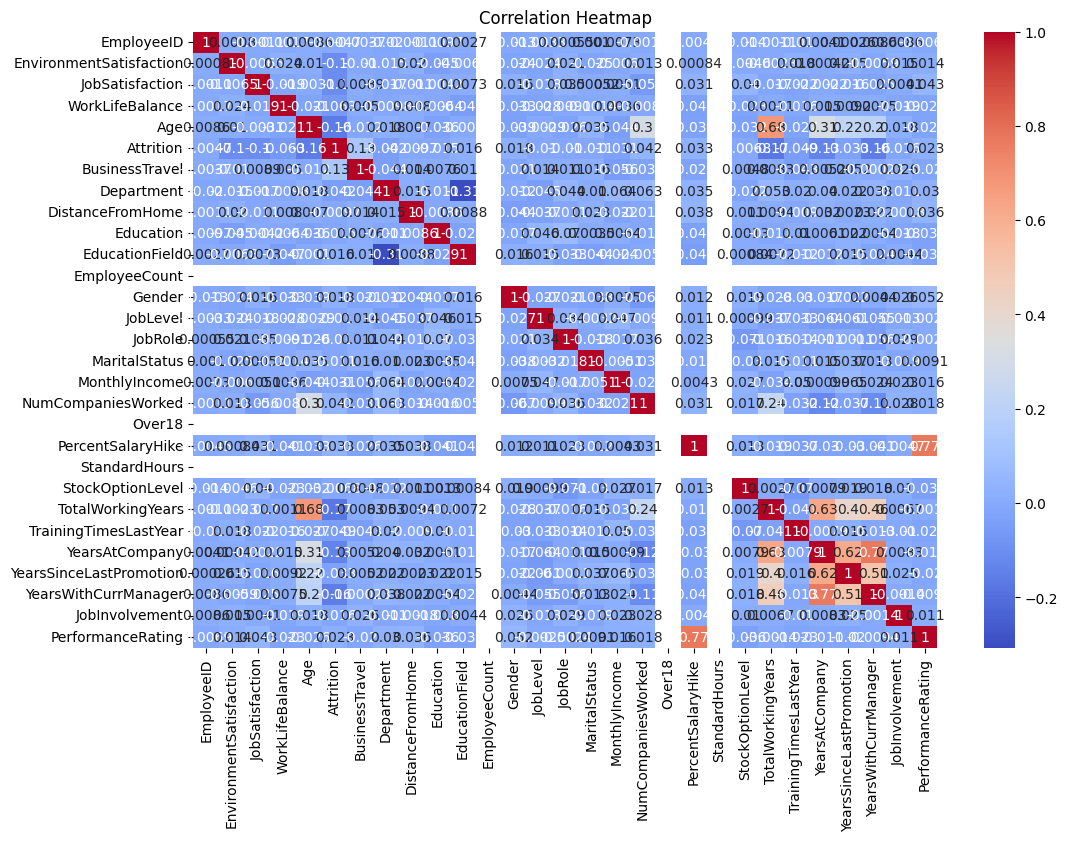

In [110]:
correlation_matrix = general_data.corr()
plt.figure(figsize=(12, 8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# Random forest

In [111]:
# Data Processing
import pandas as pd
import numpy as np
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [112]:
# Split the data into features (X) and target (y)
x = general_data.drop('Attrition', axis=1)
y = general_data['Attrition']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

# metrics
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')


Accuracy: 99.21%
Precision: 97.99%
Recall: 97.33%


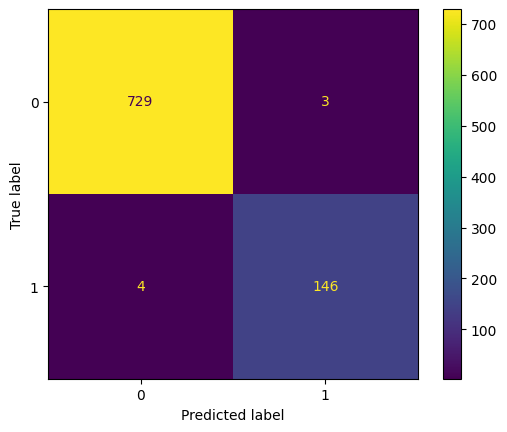

In [113]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

In [114]:
sorted_features = sorted(
    zip(model.feature_names_in_, model.feature_importances_),
    key=lambda x: x[1],  # Trier par la deuxième valeur (importance)
    reverse=True         # Ordre décroissant
)

# Afficher les résultats triés
for feature, importance in sorted_features:
    print(f'{feature}: {importance * 100:.2f}%')

Age: 8.79%
MonthlyIncome: 8.38%
TotalWorkingYears: 7.86%
YearsAtCompany: 5.90%
DistanceFromHome: 5.46%
PercentSalaryHike: 5.03%
NumCompaniesWorked: 5.01%
JobRole: 4.39%
EnvironmentSatisfaction: 4.23%
YearsWithCurrManager: 3.86%
JobSatisfaction: 3.69%
YearsSinceLastPromotion: 3.36%
WorkLifeBalance: 3.31%
EducationField: 3.27%
TrainingTimesLastYear: 3.22%
Education: 3.17%
MaritalStatus: 3.00%
EmployeeID: 2.97%
JobLevel: 2.85%
BusinessTravel: 2.85%
JobInvolvement: 2.83%
StockOptionLevel: 2.34%
Department: 2.07%
Gender: 1.30%
PerformanceRating: 0.86%
EmployeeCount: 0.00%
Over18: 0.00%
StandardHours: 0.00%
